Data from over 45 thousand car models from 2000 to 2013

importing required libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [ ]:
def removeZeros(lst0, lst1, lst2):
  flag = False
  for i in range(0, len(lst2)):
    if lst2[i] == 0.0 and lst1[i] == 0:
      flag = True
      lst2.pop(i)
      lst1.pop(i)
      lst0.pop(i)
      break
  if flag:
    return removeZeros(lst0, lst1, lst2)
  else:
    return lst0, lst1, lst2
  

In [ ]:
def emn(x):
  n = len(x)
  s = 0
  for i in x:
    if pd.isna(i):
      s += 0
    else:
      s += i
  return s

Reading the file and converting columns to list

In [ ]:
# Reading data
df = pd.read_csv('data.csv', usecols = ['year', 'noise_level', 'co2', 'co_emissions', 'thc_emissions', 'nox_emissions', 'particulates_emissions', 'fuel_type'])
# Converting to lists
years = df['year'].tolist()
noises = df['noise_level'].tolist()
c_di = df['co2'].tolist()
c_mono = df['co_emissions'].tolist()
thc = df['thc_emissions'].tolist()
nox = df['nox_emissions'].tolist()
particulates = df['particulates_emissions'].tolist()
fuel = df['fuel_type'].tolist()


Petrol vs Diesel vehicles

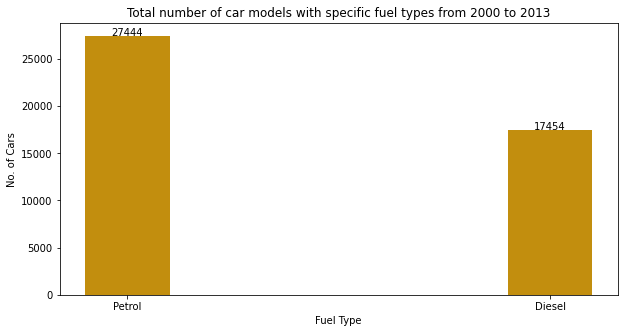

In [ ]:
# Getting count
petrol = 0
diesel = 0
for x in fuel:
  if x == 'Petrol':
    petrol += 1
  if x == 'Diesel':
    diesel += 1
# Plotting graph
plt.figure(figsize = (10, 5))
items = ['Petrol', 'Diesel']
counts = [petrol, diesel]
plt.bar(items, counts, color = '#C28E0E', width = 0.2)
addlabels(items, counts)
plt.xlabel("Fuel Type")
plt.ylabel("No. of Cars")
plt.title("Total number of car models with specific fuel types from 2000 to 2013")
plt.show()

Across the years

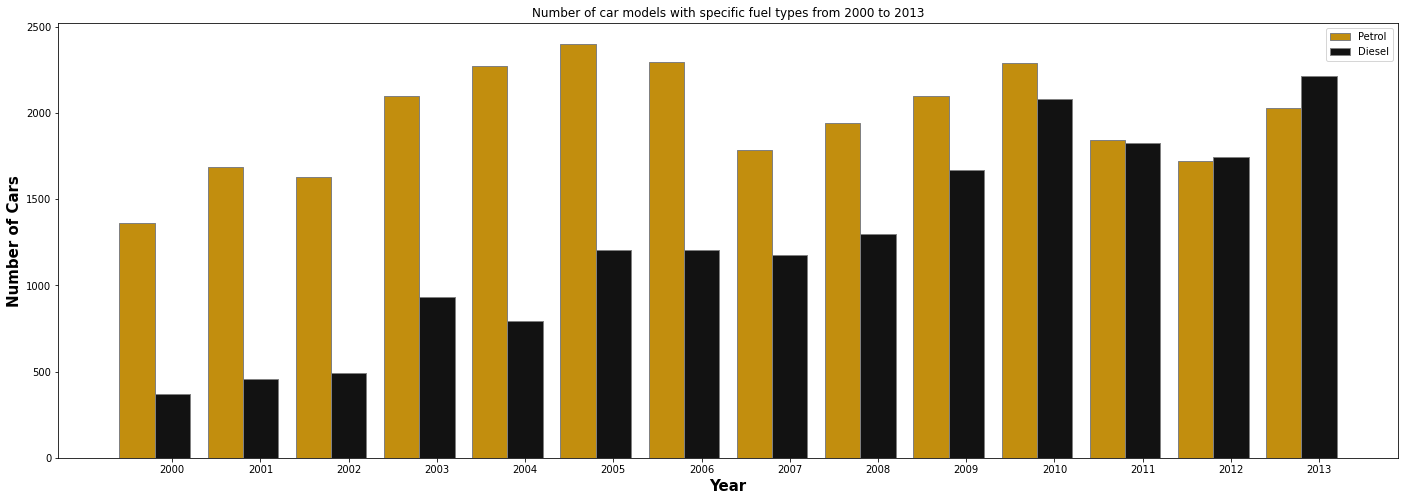

In [ ]:
years_clean = [*set(years)]
diesel_pa = []
petrol_pa = []
for x in years_clean:
  diesel_pa.append(0)
  petrol_pa.append(0)
for i in range(len(fuel)):
  y = years[i]
  f = fuel[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc:
      if f == 'Petrol':
        petrol_pa[j] += 1
      if f == 'Diesel':
        diesel_pa[j] += 1
# Plotting graph
barWidth = 0.4
fig = plt.subplots(figsize =(24, 8))
br1 = np.arange(len(petrol_pa))
br2 = [x + barWidth for x in br1]
plt.bar(br1, petrol_pa, color ='#C28E0E', width = barWidth,
        edgecolor ='grey', label ='Petrol')
plt.bar(br2, diesel_pa, color ='#121212', width = barWidth,
        edgecolor ='grey', label ='Diesel')
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Cars', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(petrol_pa))],
        years_clean)

plt.title("Number of car models with specific fuel types from 2000 to 2013")
plt.legend()
plt.show()

Carbon Dioxide emissions

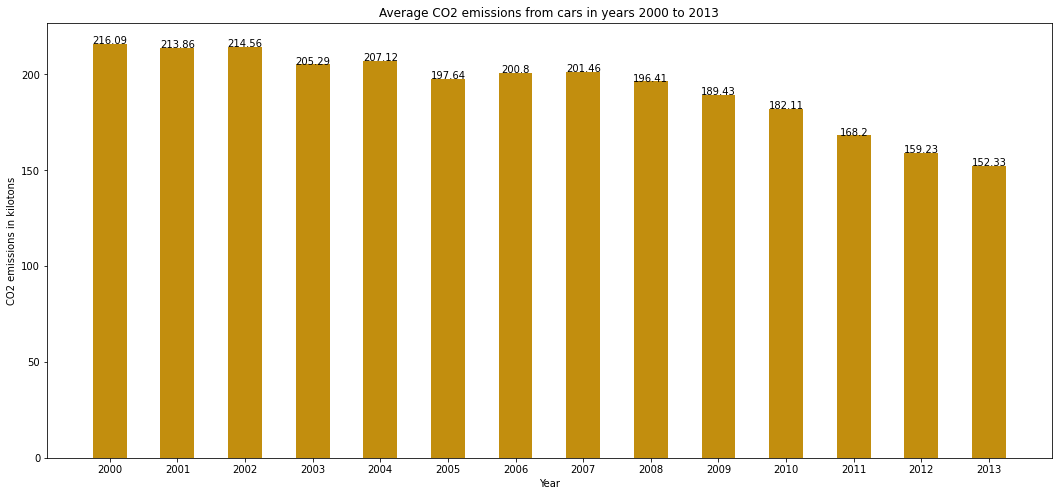

In [ ]:
c_di_pa = []
c_di_count = []
for x in years_clean:
  c_di_pa.append(0.0)
  c_di_count.append(0)
for i in range(len(c_di)):
  y = years[i]
  co2 = c_di[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(co2):
      c_di_pa[j] += co2
      c_di_count[j] += 1
for i in range(0, len(c_di_pa)):
  c_di_pa[i] = round(c_di_pa[i] / c_di_count[i], 2)
# Plotting graph
plt.figure(figsize = (18, 8))
yc_label = [str(x) for x in years_clean]
plt.bar(yc_label, c_di_pa, color = '#C28E0E', width = 0.5)
addlabels(yc_label, c_di_pa)
plt.xlabel("Year")
plt.ylabel("CO2 emissions in kilotons")
plt.title("Average CO2 emissions from cars in years 2000 to 2013")
plt.show()

Carbon Monoxide emissions

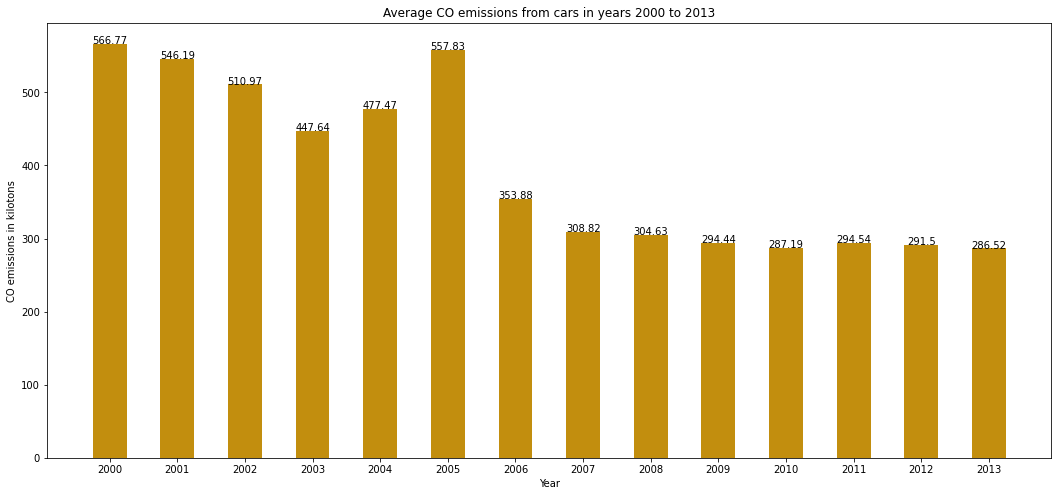

In [ ]:
c_mono_pa = []
c_mono_count = []
for x in years_clean:
  c_mono_pa.append(0.0)
  c_mono_count.append(0)
for i in range(len(c_mono)):
  y = years[i]
  co = c_mono[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(co):
      c_mono_pa[j] += co
      c_mono_count[j] += 1
for i in range(0, len(c_mono_pa)):
  c_mono_pa[i] = round(c_mono_pa[i] / c_mono_count[i], 2)
# Plotting graph
plt.figure(figsize = (18, 8))
plt.bar(yc_label, c_mono_pa, color = '#C28E0E', width = 0.5)
addlabels(yc_label, c_mono_pa)
plt.xlabel("Year")
plt.ylabel("CO emissions in kilotons")
plt.title("Average CO emissions from cars in years 2000 to 2013")
plt.show()

THC emissions

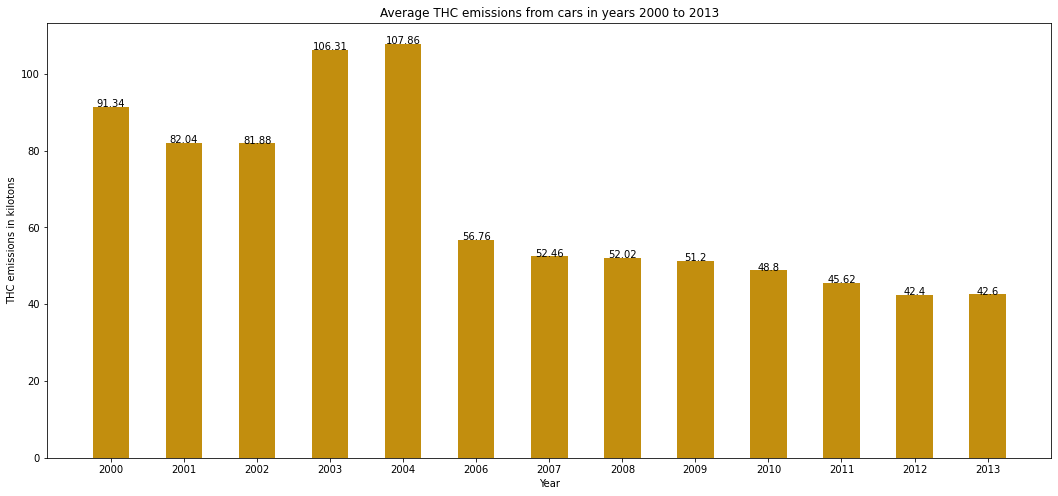

In [ ]:
thc_pa = []
thc_count = []
for x in years_clean:
  thc_pa.append(0.0)
  thc_count.append(0)
for i in range(len(thc)):
  y = years[i]
  thc_emit = thc[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(thc_emit):
      thc_pa[j] += thc_emit
      thc_count[j] += 1
for i in range(0, len(thc_pa)):
  if thc_count[i] != 0:
    thc_pa[i] = round(thc_pa[i] / thc_count[i], 2)
yc_thc_label = removeZeros(yc_label, thc_count, thc_pa)
# Plotting graph
plt.figure(figsize = (18, 8))
plt.bar(yc_thc_label[0], yc_thc_label[2], color = '#C28E0E', width = 0.5)
addlabels(yc_thc_label[0], yc_thc_label[2])
plt.xlabel("Year")
plt.ylabel("THC emissions in kilotons")
plt.title("Average THC emissions from cars in years 2000 to 2013")
plt.show()

NOx emissions

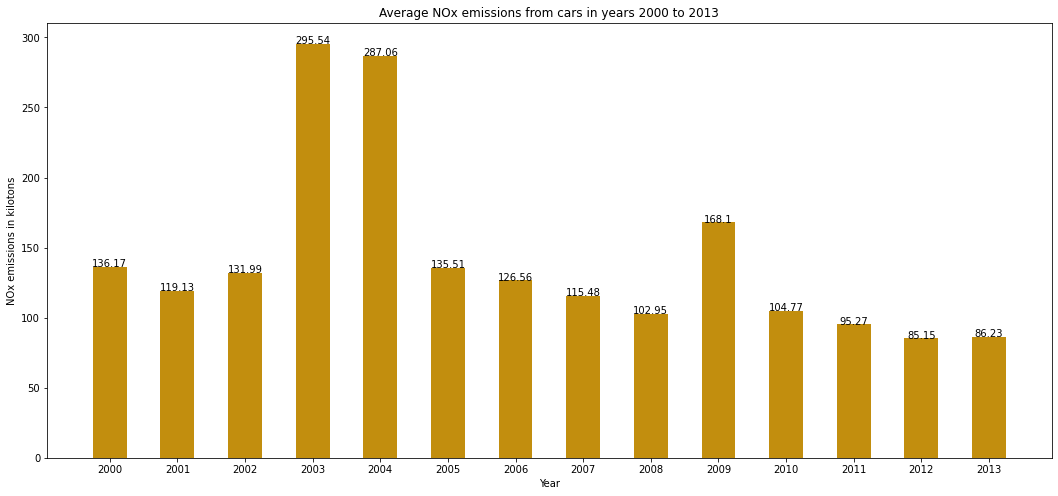

In [ ]:
yc_label = [str(x) for x in years_clean]
nox_pa = []
nox_count = []
for x in years_clean:
  nox_pa.append(0.0)
  nox_count.append(0)
for i in range(len(nox)):
  y = years[i]
  nox_emit = nox[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(nox_emit):
      nox_pa[j] += nox_emit
      nox_count[j] += 1
for i in range(0, len(nox_pa)):
  if nox_count[i] != 0:
    nox_pa[i] = round(nox_pa[i] / nox_count[i], 2)
yc_nox_label = removeZeros(yc_label, nox_count, nox_pa)
# Plotting graph
plt.figure(figsize = (18, 8))
plt.bar(yc_nox_label[0], yc_nox_label[2], color = '#C28E0E', width = 0.5)
addlabels(yc_nox_label[0], yc_nox_label[2])
plt.xlabel("Year")
plt.ylabel("NOx emissions in kilotons")
plt.title("Average NOx emissions from cars in years 2000 to 2013")
plt.show()

Noise levels

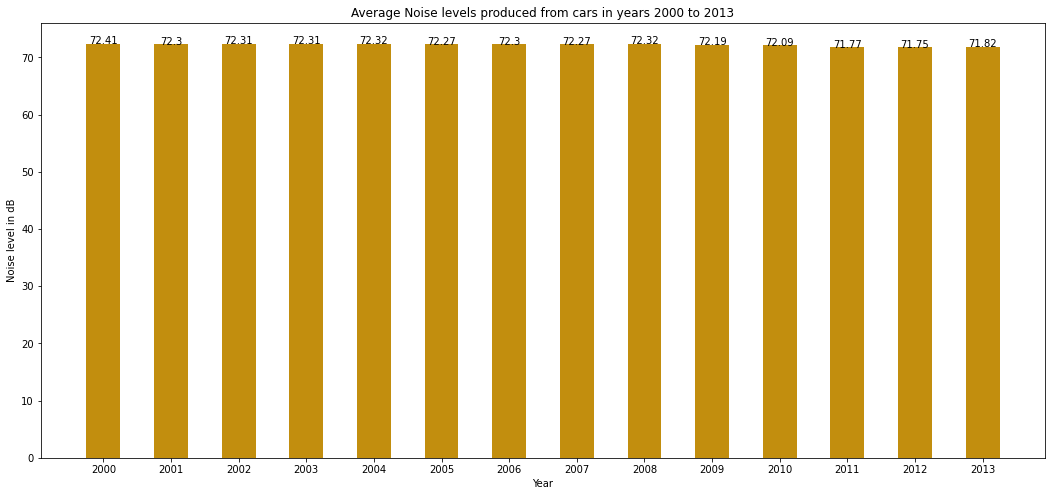

In [ ]:
noises_pa = []
noises_count = []
for x in years_clean:
  noises_pa.append(0.0)
  noises_count.append(0)
for i in range(len(noises)):
  y = years[i]
  noises_emit = noises[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(noises_emit):
      noises_pa[j] += noises_emit
      noises_count[j] += 1
for i in range(0, len(noises_pa)):
  if noises_count[i] != 0:
    noises_pa[i] = round(noises_pa[i] / noises_count[i], 2)
yc_noises_label = removeZeros(yc_label, noises_count, noises_pa)
# Plotting graph
plt.figure(figsize = (18, 8))
plt.bar(yc_noises_label[0], yc_noises_label[2], color = '#C28E0E', width = 0.5)
addlabels(yc_noises_label[0], yc_noises_label[2])
plt.xlabel("Year")
plt.ylabel("Noise level in dB")
plt.title("Average Noise levels produced from cars in years 2000 to 2013")
plt.show()

Emissions each year

In [ ]:
emissions = []
for x in years:
  emissions.append(0.0)
for i in range(0, len(years)):
  avg = emn([c_di[i], c_mono[i], thc[i], nox[i]])
  emissions[i] = avg

In [ ]:
def removeOutliers(x):
  for i in x:
    if i > 10000:
      x.remove(i)
  return x

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


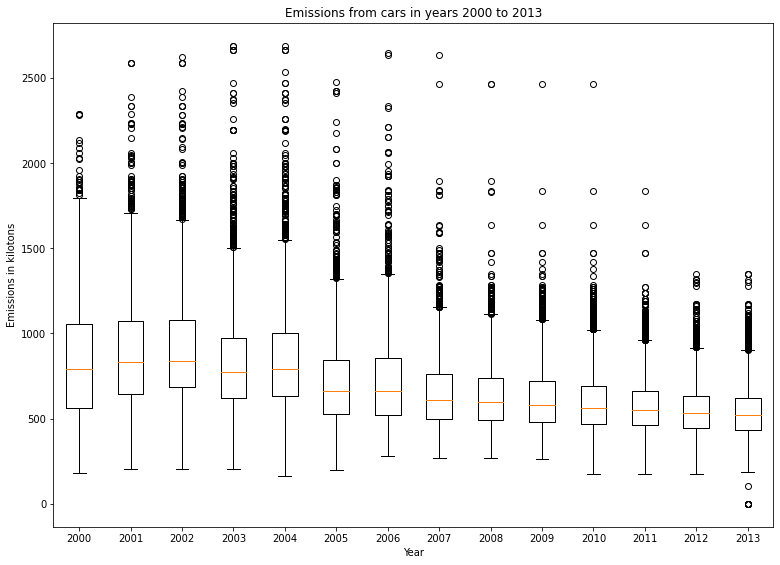

In [ ]:
average_emissions_pa = []
average_emissions_count = []
for x in years_clean:
  average_emissions_pa.append([])
for i in range(len(emissions)):
  y = years[i]
  average_emissions_emit = emissions[i]
  if average_emissions_emit > 5000:
    continue
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(average_emissions_emit):
      average_emissions_pa[j].append(average_emissions_emit)
# Plotting plots
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(years_clean)
bp = ax.boxplot(average_emissions_pa)
plt.xlabel('Year')
plt.ylabel('Emissions in kilotons')
plt.title('Emissions from cars in years 2000 to 2013')
plt.show()

Average emissions over time

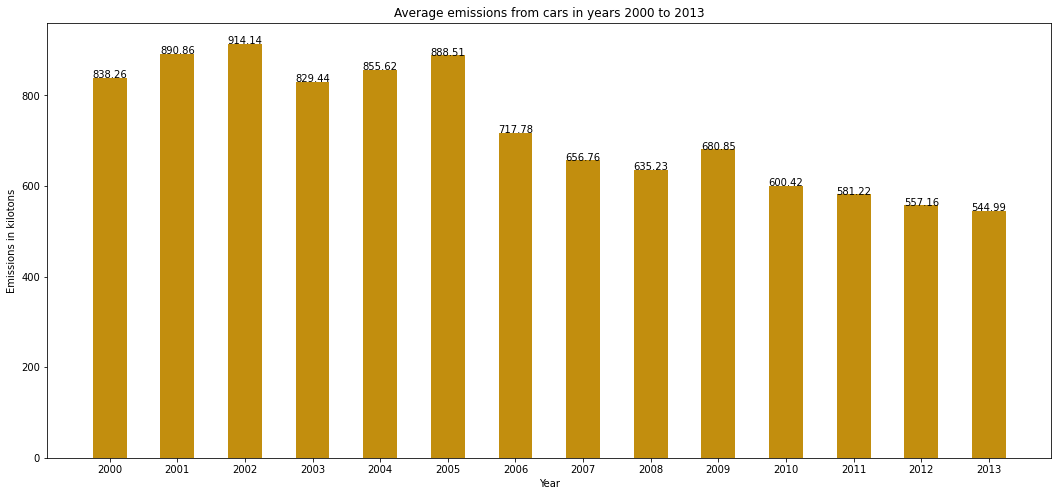

In [ ]:
average_emissions = emissions

average_emissions_pa = []
average_emissions_count = []
for x in years_clean:
  average_emissions_pa.append(0.0)
  average_emissions_count.append(0)
for i in range(len(average_emissions)):
  y = years[i]
  average_emissions_emit = average_emissions[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc and not pd.isna(average_emissions_emit):
      average_emissions_pa[j] += average_emissions_emit
      average_emissions_count[j] += 1
for i in range(0, len(average_emissions_pa)):
  if average_emissions_count[i] != 0:
    average_emissions_pa[i] = round(average_emissions_pa[i] / average_emissions_count[i], 2)
yc_average_emissions_label = removeZeros(yc_label, average_emissions_count, average_emissions_pa)
# Plotting graph
plt.figure(figsize = (18, 8))
plt.bar(yc_average_emissions_label[0], yc_average_emissions_label[2], color = '#C28E0E', width = 0.5)
addlabels(yc_average_emissions_label[0], yc_average_emissions_label[2])
plt.xlabel("Year")
plt.ylabel("Emissions in kilotons")
plt.title("Average emissions from cars in years 2000 to 2013")
plt.show()

Petrol vs Diesel emissions

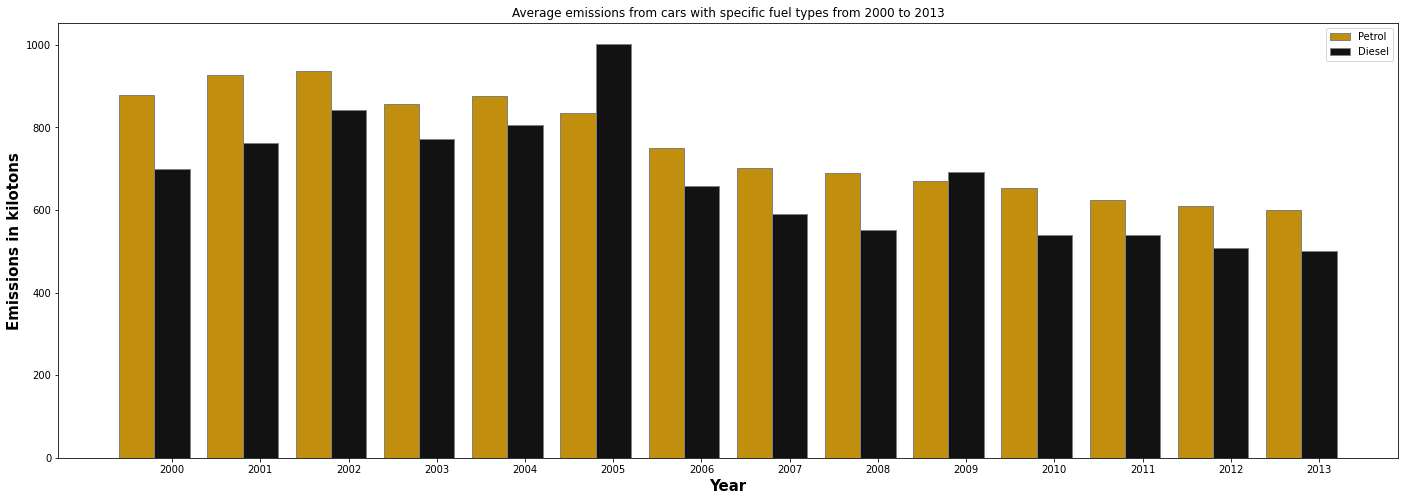

In [ ]:
years_clean = [*set(years)]
diesel_pa = []
petrol_pa = []
for x in years_clean:
  diesel_pa.append(0)
  petrol_pa.append(0)
for i in range(len(fuel)):
  y = years[i]
  f = fuel[i]
  for j in range(0, len(years_clean)):
    yc = years_clean[j]
    if y == yc:
      if f == 'Petrol':
        petrol_pa[j] += 1
      if f == 'Diesel':
        diesel_pa[j] += 1
petrol_emit = []
diesel_emit = []
for x in years_clean:
  petrol_emit.append(0.0)
  diesel_emit.append(0.0)
for i in range(0, len(years_clean)):
  for j in range(0, len(years)):
    y = years[j]
    e = emissions[j]
    f = fuel[j]
    if y == years_clean[i]:
      if f == 'Petrol':
        petrol_emit[i] += e
      if f == 'Diesel':
        diesel_emit[i] += e
for i in range(0, len(petrol_emit)):
  petrol_emit[i] = petrol_emit[i] / petrol_pa[i]
for i in range(0, len(diesel_emit)):
  diesel_emit[i] = diesel_emit[i] / diesel_pa[i]
# Plotting graph
barWidth = 0.4
fig = plt.subplots(figsize =(24, 8))
br1 = np.arange(len(petrol_pa))
br2 = [x + barWidth for x in br1]
plt.bar(br1, petrol_emit, color ='#C28E0E', width = barWidth,
        edgecolor ='grey', label ='Petrol')
plt.bar(br2, diesel_emit, color ='#121212', width = barWidth,
        edgecolor ='grey', label ='Diesel')
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Emissions in kilotons', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(petrol_emit))],
        years_clean)

plt.title("Average emissions from cars with specific fuel types from 2000 to 2013")
plt.legend()
plt.show()